<h1 style='color:#0000ec'>8 &nbsp;Estudo comparativo - Soluções numéricas e analítica</h1>

<h2 style='color:#0000b7' >&nbsp; 8.1 &nbsp;Erro absoluto e percentual</h2>

&nbsp; &nbsp; &nbsp; Esta seção tem como objetivo comparar a solução analítica e a aproximação numérica com a população estimada para 2021 pelo IBGE.

&nbsp; &nbsp; &nbsp; Os resultados obtidos pela solução analítica, pelo método de Euler, Euler modificado e RK4:

<center><b>Aproximação populacional pelo modelo de Malthus</b></center>

| Método | Número de habitantes |
| --- | --- |
| LSODA | 209760.59999083 |
| Euler | 209759.35909435 |
| Euler modificado | 209759.42816025 |
|RK4 |209759.42816037 |
|RK45|  209760.60286601182|

<center>Fonte: O autor</center>

<br>

<center><b>Aproximação populacional pelo modelo de Verhulst</b></center>

| Método | Número de habitantes |
| --- | --- |
| LSODA | 208447.55940518 |
| Euler | 208446.62006659 |
| Euler modificado | 208446.56882837 |
|RK4 |208446.56882864 |
|RK45|  208447.55725928|

<center>Fonte: O autor</center>

&nbsp; &nbsp; &nbsp; Importando bibliotecas:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

&nbsp; &nbsp; &nbsp; Declarando o nome dos métodos, aproximações e a população estimada pelo IBGE:

In [2]:
metodos = ['Analítico','LSODA','Euler','Euler modificado','RK4','RK45']

solucoes_malthus = [209761,
            209760.59999083,
            209759.35909435,
            209759.42816025,
            209759.42816037, 
            209760.60286601182]

solucoes_verhulst = [208447.5573077047,
            208447.55940518,
            208446.62006659,
            208446.56882837,
            208446.56882864, 
            208447.55725928]

index = [0,1,2,3,4]

solucao_IBGE = 212881

&nbsp; &nbsp; &nbsp; A seguir, escrevemos a função <i><b>erro_ibge(	&lt;Index>,	&lt;solução do IBGE>,	&lt;Vetor solução>,	&lt;métodos>)</b></i> o erro das soluções obtidas com relação a população fornecida pelo IBGE.

In [3]:
%%writefile ../python/erro_ibge.py

import numpy as np

def erro_ibge(index,solucao_IBGE,solucoes,metodos):
    
    dados = [[0, 0, 0]]
    
    for i in index:
        erro_hab = solucao_IBGE - solucoes[i]
        erro_perc = (erro_hab/solucao_IBGE)*100
        #Adicionando linhas à matriz (tabela)
        dados = np.vstack([dados,[metodos[i],round(erro_hab),str(round(erro_perc,2))+'%']])
        
    #remove a primeira linha da matriz
    dados = np.delete(dados, 0, 0)
    
    return dados

Overwriting ../python/erro_ibge.py


&nbsp; &nbsp; &nbsp; Importando função escrita em <b>[3]</b>

In [4]:
import sys
sys.path.insert(0, '../python')
from erro_ibge import erro_ibge

&nbsp; &nbsp; &nbsp; Atribuindo as aproximações à funções <i><b>erro_ibge</b></i>.

In [5]:
dados_malthus = erro_ibge(index,solucao_IBGE,solucoes_malthus,metodos)

dados_verhulst = erro_ibge(index,solucao_IBGE,solucoes_verhulst,metodos)

&nbsp; &nbsp; &nbsp; Finalmente, exibimos os dados armazenados:

Malthus:


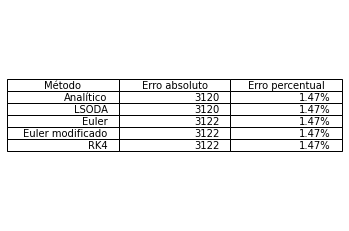

In [6]:
fig, ax =plt.subplots(1,1)
column_labels=['Método', 'Erro absoluto', 'Erro percentual']
ax.axis('tight')
ax.axis('off')

print('Malthus:')
ax.table(cellText=dados_malthus,colLabels=column_labels,loc='center')
plt.show()

Verhulst


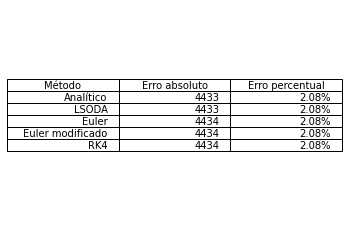

In [7]:
fig, ax =plt.subplots(1,1)
column_labels=['Método', 'Erro absoluto', 'Erro percentual']
ax.axis('tight')
ax.axis('off')

print('Verhulst')
ax.table(cellText=dados_verhulst,colLabels=column_labels,loc='center')
plt.show()